In [1]:
import pandas as pd
import re
import random
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

def clean_text(text: str):
    if not isinstance(text, str):
        # raise TypeError("text must be a string")
        return ""

    # remove urls
    text = re.sub(r"http\S+", " رابط ", text)

    # replace any digit with رقم
    text = re.sub(r"\d+", " رقم ", text)

    # set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text)

    words = word_tokenize(text)
    text = " ".join([ w for w in words if len(w) > 1 ] )

    return text.lower().strip()


[nltk_data] Downloading package punkt to /Users/izx_gamex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
nltk.download('punkt_tab')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/izx_gamex/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/izx_gamex/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

----------------------------------------------------------------


# Preprocess functions

In [4]:
import pandas as pd

# load the data of the comments
df=pd.read_csv("/Users/izx_gamex/Desktop/Tuwaiq/capston/df0_574cleaned.csv")




# Add an ID column to the dataframe
# df.insert(0, "Comment_ID", range(1, len(df) + 1))
# df["Comment_ID"]
# df.to_csv("df0_574cleaned.csv")

In [ ]:


# Define delimiters for splitting comments
delimiters = ["\n", "،", ".",'"','(',')']

# Function to split text using multiple delimiters
import re
def split_comment(comment):
    if pd.isna(comment):  # Handle NaN values
        return []
    return [segment.strip() for segment in re.split("|".join(map(re.escape, delimiters)), comment) if segment.strip()]

# Apply the function to split comments and explode into separate rows
df_exploded = df.assign(Comments=df["Comments"].apply(split_comment)).explode("Comments")

df_exploded
# Function to further split comments by the first character if it is "و"
def split_by_waw(comment):
    words = comment.split()  # Split by space
    result = []
    temp = []
    
    for word in words:
        if word.startswith("و") and temp:
            result.append(" ".join(temp))  # Store previous chunk
            temp = [word]  # Start new chunk
        else:
            temp.append(word)
    
    if temp:  # Add the last chunk
        result.append(" ".join(temp))
    
    return result

# Apply the function and explode again
df_exploded["Comments"] = df_exploded["Comments"].apply(split_by_waw)
df = df_exploded.explode("Comments").reset_index(drop=True)

df

سيئه جدا تدمرت نفسية ولدي بسبب سوء تعاملهم معه واهمالهم مافيه اي اهتمام بالطفل كل اسبوع او اسبوعين يتصلون فقط يعلموني انه مصاب او مضروب او طايح اي اتصال ثاني عن الطفل مافي
اجي اتكلم معاهم مافي اي تجاوب اسأل عن ولدي ردهم كلهم فقط" الحمدلله كويس"
ولدي يشتكي من ضربهم له وضرب الاطفال وعقابهم يوقفونه على الجدار خير وين عايشين وين اساليب التربيه والتعامل مع الطفل والتحفيز صراحه ندددمت اشد الندم اني دخلته عندهم
اكبر همهم محتوى التواصل الاجتماعي فقططط


,Comment_ID,Time_Elapsed,Comments,Likes,url
0,1,3m,مركز ممتاز,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
1,1,3m,ومميز بتنوع انشطتهم,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
2,1,3m,الإداريات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
3,1,3m,والمعلمات كلهم بشوشات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
4,1,3m,ويهبل تعاملهم مع الاطفال😻 …,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
...,...,...,...,...,...
74412,11203,1y,ممتاز ماشاء الله تبارك الله,1.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74413,11204,6m,فيه اقساط !؟,0.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74414,11205,2y,رايع جميل,3.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74415,11206,2y,ما يردون على الهاتف,0.0,https://www.google.com/maps/place/%D9%85%D8%AF...


In [ ]:

# delete comments that contain english words
df['Comments'] = df['Comments'].astype(str)
df_filtered = df[~df['Comments'].str.contains(r'[A-Za-z]', regex=True)]
df = df_filtered

# Clean the text of the comments
df['Comments'] = df['Comments'].apply(clean_text)
df

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_18807/676240213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments'] = df['Comments'].apply(clean_text)


,Comment_ID,Time_Elapsed,Comments,Likes,url
0,1,3m,مركز ممتاز,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
1,1,3m,ومميز بتنوع انشطتهم,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
2,1,3m,الإداريات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
3,1,3m,والمعلمات كلهم بشوشات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
4,1,3m,ويهبل تعاملهم مع الاطفال,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
...,...,...,...,...,...
74412,11203,1y,ممتاز ماشاء الله تبارك الله,1.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74413,11204,6m,فيه اقساط,0.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74414,11205,2y,رايع جميل,3.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74415,11206,2y,ما يردون على الهاتف,0.0,https://www.google.com/maps/place/%D9%85%D8%AF...


In [ ]:
import re

# Alternative function to detect if a string contains only emojis
def is_only_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    
    text = text.strip()  # Remove leading/trailing spaces
    return all(emoji_pattern.match(char) for char in text) if text else False

# Function to check for whitespace-only comments
def is_only_whitespace(text):
    return text.strip() == ""  # Check if text is empty after stripping spaces

# Ensure column is string type
df["Comments"] = df["Comments"].astype(str)

# Remove whitespace-only and emoji-only comments
df_filtered = df[~df["Comments"].apply(is_only_whitespace)]  # Remove whitespace-only comments
df_filtered = df_filtered[~df_filtered["Comments"].apply(is_only_emoji)]  # Remove emoji-only comments

df =df_filtered
df

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_18807/3440085127.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Comments"] = df["Comments"].astype(str)


,Comment_ID,Time_Elapsed,Comments,Likes,url
0,1,3m,مركز ممتاز,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
1,1,3m,ومميز بتنوع انشطتهم,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
2,1,3m,الإداريات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
3,1,3m,والمعلمات كلهم بشوشات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
4,1,3m,ويهبل تعاملهم مع الاطفال,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
...,...,...,...,...,...
74410,11202,2y,اشكر موظفات مركز صغاري لتعاونهم معي,10.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74412,11203,1y,ممتاز ماشاء الله تبارك الله,1.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74413,11204,6m,فيه اقساط,0.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74414,11205,2y,رايع جميل,3.0,https://www.google.com/maps/place/%D9%85%D8%AF...


In [ ]:
import re
import string
import pandas as pd
import arabicstopwords.arabicstopwords as stp

# -----------------------------
# 1. Define Arabic Preprocessing Functions
# -----------------------------

def preprocess_arabic(text):
    """
    Preprocess Arabic text:
      - Remove diacritics (tashkeel)
      - Normalize characters (e.g., different forms of Alef to a standard form)
      - Remove elongation (limit repeated characters)
      - Remove English letters and digits
      - Remove punctuation and extra spaces
    """
    # Ensure text is a string
    text = str(text)
    
    # Remove diacritics (Arabic Tashkeel)
    # Unicode ranges: \u0617-\u061A and \u064B-\u0652
    tashkeel_pattern = r'[\u0617-\u061A\u064B-\u0652]'
    text = re.sub(tashkeel_pattern, '', text)
    
    # Normalize characters: map different forms of Alef to a standard 'ا'
    text = re.sub(r'[إأٱآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'ء', text)
    text = re.sub(r'ئ', 'ء', text)
    # Optionally, replace Taa Marbuta with Ha (or leave as is depending on your needs)
    text = re.sub(r'ة', 'ه', text)
    
    # Remove elongation: keep at most two consecutive occurrences of a character
    text = re.sub(r'(.)\1+', r'\1\1', text)
    
    # Remove English letters and digits
    text = re.sub(r'[A-Za-z0-9]+', '', text)
    
    # Remove punctuation (both English and common Arabic punctuation)
    # The string.punctuation covers English punctuation; add Arabic punctuation manually.
    punct_pattern = f"[{re.escape(string.punctuation)}،؟«»؛…“”‘’–—•]"
    text = re.sub(punct_pattern, ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def tokenize_and_remove_stopwords(text):
    """
    Simple tokenization by splitting on whitespace and then remove Arabic stopwords.
    """
    # Tokenize by splitting on spaces
    tokens = text.split()
    
    stop_words = stp.stopwords_list()


# Define your additional stopwords
    extra_stopwords = [
       'مركز', 'اطفال', 'اطفالنا', 'الاطفال', 'رياض', 'انشطه', 'مدرسه',
       'الله', 'علي', 'ممتاز', 'رائع', 'جدا', 'اكثر', 'ماشاءالله',
        'شكرا', 'نوره', 'بنتي', 'ولدي', 'ابني', 'بنت', 'ولد', 'انا', 'عندي', 'عندهم','والله',
        'المدرسه', 'المدرسة','اللي','تبارك','يسعدهم','تقول','اي','للتواصل','ممكن'
      ]
    
    extended_stop_words = stop_words + extra_stopwords

    # Load Arabic stopwords as a set for fast lookup
    extended_stop_words = set(stp.stopwords_list())
    
    # Remove stopwords
    tokens_filtered = [token for token in tokens if token not in extended_stop_words]
    
    # Rejoin tokens into a processed string
    return ' '.join(tokens_filtered)

# -----------------------------
# 2. Load and Preprocess the Dataset
# -----------------------------



# Apply the preprocessing functions to the Comments column
df['Comments'] = df['Comments'].apply(preprocess_arabic)
df['Comments'] = df['Comments'].apply(tokenize_and_remove_stopwords)

# Optionally, remove rows with very short comments (length <= 5 characters)
df['length'] = df['Comments'].str.len()
df = df[df['length'] > 5].copy()
df.drop(columns='length', inplace=True)

df

Sample preprocessed comments:


,Comment_ID,Time_Elapsed,Comments,Likes,url
0,1,3m,مركز ممتاز,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
1,1,3m,ومميز بتنوع انشطتهم,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
2,1,3m,الاداريات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
3,1,3m,والمعلمات بشوشات,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
4,1,3m,ويهبل تعاملهم الاطفال,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...
...,...,...,...,...,...
74409,11201,2y,بارك الله,7.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74410,11202,2y,اشكر موظفات مركز صغاري لتعاونهم,10.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74412,11203,1y,ممتاز ماشاء الله تبارك الله,1.0,https://www.google.com/maps/place/%D9%85%D8%AF...
74414,11205,2y,رايع جميل,3.0,https://www.google.com/maps/place/%D9%85%D8%AF...


In [ ]:
# take a sample from the data 
df = df.sample(frac=1, random_state=101)

In [8]:
df['Comments_len'] = df['Comments'].apply(len)

<Axes: xlabel='Comments_len', ylabel='Count'>

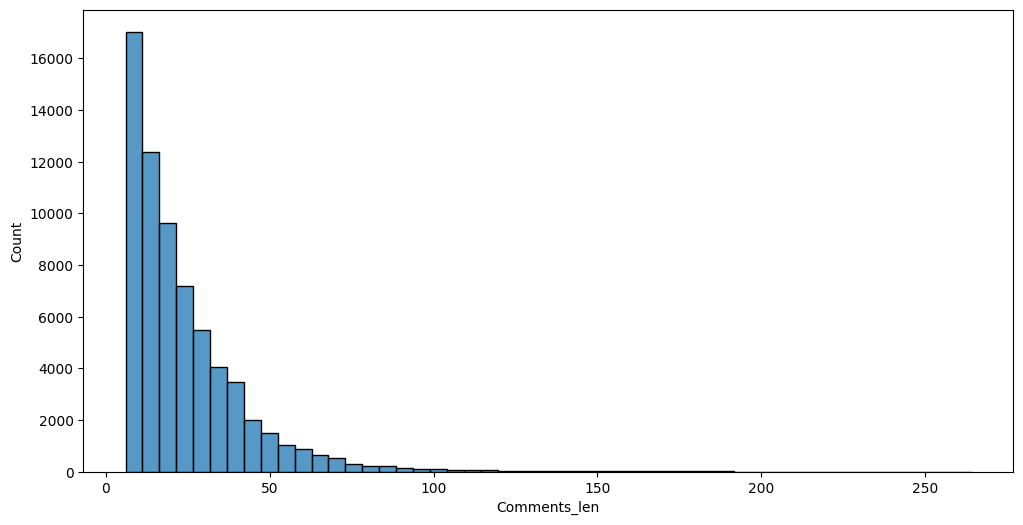

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Comments_len'], bins=50)

In [10]:
df.head(2)

,Comment_ID,Time_Elapsed,Comments,Likes,url,Comments_len
12780,1775,1y,ومكتوم العاملات جوالتهم بشكل كبير حتي حسوا انو...,5.0,https://www.google.com/maps/place/%D9%85%D8%B1...,52
877,93,5y,مدرسه راءعه,2.0,https://www.google.com/maps/place/%D9%85%D8%B1...,11


In [11]:
df=df[df['Comments_len']<100]

In [12]:
print(df.shape)

(66793, 6)


## Embedding


In [ ]:
from sentence_transformers import SentenceTransformer

model_id = "aubmindlab/bert-base-arabertv02"


embedding_model = SentenceTransformer(model_id, device="cpu")

No sentence-transformers model found with name aubmindlab/bert-base-arabertv02. Creating a new one with mean pooling.


In [14]:
Comments_embeddings = embedding_model.encode(df['Comments'].values, show_progress_bar=True)

Batches:   0%|          | 0/2088 [00:00<?, ?it/s]

In [15]:
Comments_embeddings.shape

(66793, 768)

## UMAP

In [16]:
from umap import UMAP

umap_model = UMAP(
    n_components=10,  # Keep more topic structure
    n_neighbors=10,  # Avoid too much merging
    min_dist=0.05,  # Allow some distance between clusters
    metric='cosine'
)


## Clustering

In [17]:
from hdbscan import HDBSCAN

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=100,
    min_samples=2,
    metric='euclidean',  # Fix: Change from 'cosine' to 'euclidean'
    cluster_selection_method='eom',
    prediction_data=True
)


## Vectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp

stop_words = stp.stopwords_list()

vectorizer_model = CountVectorizer(
    min_df=5,  # Allow words appearing in at least 2 documents
    max_df=0.9,  # Reduce word removal from frequent words
    stop_words=stop_words,
    ngram_range=(1, 3)
)


## Topic Representer

In [19]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

## Start

In [ ]:
from bertopic import BERTopic
from sklearn.cluster import KMeans


# Create a KMeans clustering model (specify the number of topics)
kmeans_model = KMeans(n_clusters=80, random_state=101)

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,          
    hdbscan_model=hdbscan_model,     
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    top_n_words=10,
    verbose=True
)

# Fit the model using your data and precomputed embeddings
topics, probs = topic_model.fit_transform(
    df['Comments'].values,
    Comments_embeddings
)





2025-03-18 10:13:02,200 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-03-18 10:13:28,630 - BERTopic - Dimensionality - Completed ✓
2025-03-18 10:13:28,632 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
h

In [21]:
df['topic'] = topics
df['prob'] = probs

In [22]:
topic_model_cvs=topic_model.get_topic_info()

In [24]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,36010,-1_بنتي_الاطفال_الله_المركز,"[بنتي, الاطفال, الله, المركز, راءعه, انا, مدرس...","[صراحه, بصراحه, استاذه, حضانه, مرره, المدرسه, ...","[اشكر معلمه الحضانه فعلا, وغيرو المعلمات جد كا..."
1,0,1589,0_شكرا_الشكر_اشكرهم_شكر,"[شكرا, الشكر, اشكرهم, شكر, جزيل, جزيل الشكر, ا...","[شكرا جزيلا, شكرا جميعا, وشكرا, شكرا, شكرا الق...","[شكرا صابرين, شكرا الكم, شكرا لذوقهم]"
2,1,1543,1_المعلمات_ومعلمات_راءعات_والمعلمات,"[المعلمات, ومعلمات, راءعات, والمعلمات, لطيفات,...","[ومعلمات, لمعلمات, المعلمات اشكر, معلماتهم, ال...","[ومعلمات راءعات, ومعلمات راءعات, ومعلمات راءعات]"
3,2,1369,2_مو_اذا_شي_بنتي,"[مو, اذا, شي, بنتي, اي, او, عشان, يعني, الي, اول]","[اي شي, اشوف, تبي, ماراح, مافيه, تروح, اروح, ا...",[واهم شي الرسوم تندفع اذا تاخرت الام اسبوع تطر...
4,3,1310,3_واخص_بالشكر_الاستاذه_واخص بالشكر,"[واخص, بالشكر, الاستاذه, واخص بالشكر, اشكر, اس...","[واخص بالشكر, واخص بالذكر, اشكر الاستاذه, حابه...","[واخص بالشكر المعلمه نوره العرجاني, واخص بالشك..."
...,...,...,...,...,...,...
107,106,102,106_راءعه حضانه_حضانه راءعه_حضانه_راءعه,"[راءعه حضانه, حضانه راءعه, حضانه, راءعه, حضانه...","[حضانه راءعه, راءعه حضانه, حضانه, راءعه, وحضان...","[حضانه راءعه, حضانه راءعه, حضانه راءعه]"
108,107,102,107_العافيه_يعطيكم العافيه_يعطيكم_يعطيهم,"[العافيه, يعطيكم العافيه, يعطيكم, يعطيهم, يعطي...","[الله يعطيهم العافيه, الله يعطيكم العافيه, يعط...",[الله يعطيكم العافيه جهودكم الراءعه تبذلونها ر...
109,108,101,108_المعلمات_العاملات_العاملين_المعلمين,"[المعلمات, العاملات, العاملين, المعلمين, الاها...","[المعلمات, المعلمين, العاملين, الاهالي, التدري...","[المعلمات, المعلمات, المعلمات]"
110,109,101,109_وحنونين_مريحين_ماديين_العاملين,"[وحنونين, مريحين, ماديين, العاملين, متخصصين, و...","[وحنونين, وحرصين, وتعليمي, ماديين, حنونين, كوي...","[وحنونين, وحنونين, وحنونين]"


In [ ]:
# topic_model_cvs.to_csv('topic_model_cvs.csv')

In [44]:
df.head()

,Comment_ID,Time_Elapsed,Comments,Likes,url,Comments_len,topic,prob,computed_date
12780,1775,1y,ومكتوم العاملات جوالتهم بشكل كبير حتي حسوا انو...,5.0,https://www.google.com/maps/place/%D9%85%D8%B1...,52,-1,0.000000,2024-03-18 12:00:00
877,93,5y,مدرسه راءعه,2.0,https://www.google.com/maps/place/%D9%85%D8%B1...,11,-1,0.000000,2020-03-18 12:00:00
9755,1348,8m,اشكر الاستاذه الفاضله عبير بشاشتها,0.0,https://www.google.com/maps/place/%D8%AD%D8%B6...,34,3,0.956109,2024-07-18 12:00:00
15965,2307,9m,وماشالله حريصين بمعني الكلمه شكرا للجميع شكرا ...,2.0,https://www.google.com/maps/place/%D8%A7%D8%B3...,63,-1,0.000000,2024-06-18 12:00:00
58516,8771,2m,وبنات الموظفات يهبلون حنونات الاطفال اكرر التج...,0.0,https://www.google.com/maps/place/%D9%85%D8%B1...,55,-1,0.000000,2025-01-18 12:00:00


In [ ]:
# df.to_csv('df.csv')

In [25]:
df['topic'].value_counts()

topic
-1      36010
 0       1589
 1       1543
 2       1369
 3       1310
        ...  
 106      102
 107      102
 108      101
 109      101
 110      100
Name: count, Length: 112, dtype: int64

In [27]:
df[df['topic']==3].head()

,Comment_ID,Time_Elapsed,Comments,Likes,url,Comments_len,topic,prob
9755,1348,8m,اشكر الاستاذه الفاضله عبير بشاشتها,0.0,https://www.google.com/maps/place/%D8%AD%D8%B6...,34,3,0.956109
70894,10614,2y,والحروف اخص بالشكر المديره هناء حسن تعاملها,4.0,https://www.google.com/maps/place/%D9%85%D8%B1...,43,3,1.000000
35549,5086,3y,صرح يطمح داءما لافضل مايمكن ان يكون شكرا ايتها...,9.0,https://www.google.com/maps/place/%D9%85%D8%AF...,62,3,1.000000
62623,9343,1y,اشكر الاستاذه مها خوفها,3.0,https://www.google.com/maps/place/%D9%85%D8%B1...,23,3,1.000000
31450,4549,4m,واخص بالشكر المعلمه الراءعه,0.0,https://www.google.com/maps/place/%D8%B1%D9%88...,27,3,1.000000


In [31]:
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'شكرا | الشكر | اشكرهم | شكر | جزيل', 1589],
                                   [1, 'المعلمات | ومعلمات | راءعات | والمعلمات | لطيفات', 1543],
                                   [2, 'مو | اذا | شي | بنتي | اي', 1369],
                                   ...,
                                   [108, 'المعلمات | العاملات | العاملين | المعلمين | الاهالي', 101],
                                   [109, 'وحنونين | مريحين | ماديين | العاملين | متخصصين', 101],
                                   [110, 'الحروف | وتعلم | الاحرف | حروف | كلمات', 100]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': {'bdata': ('NQYHBlkFHgUaBCEDDQO1AqICKAIWAu' ... 'BqAGoAaQBpAGcAZwBmAGYAZQBlAGQA'),
                                  'dtype': 'i2'},
                         'sizemode': 'area',
                         'sizeref': 0.993125,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('PtHmQH7kwsBOEtXAh4SPQMN1UEBIsV' ... 'h+QSawH0Bre1DB/3AwQSxIK0Hx3DFB'),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('hOXMQBLRk0BKtAdADxyQQLnzOcDZip' ... '8GQKiVVMD/b5BB241JQeli0EBBO7tA'),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': np.float32(-15.238899),
                                'y': np.float32(4.076839),
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': np.float32(1.5323095),
                                'xshift': 10,
                                'y': np.float32(21.017097)}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(1.5323095),
                           'x1': np.float32(1.5323095),
                           'y0': np.float32(-12.86342),
                           'y1': np.float32(21.017097)},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(-15.238899),
                           'x1': np.float32(18.303518),
                           'y0': np.float32(4.076839),
                           'y1': np.float32(4.076839)}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                      

In [32]:
topic_model.visualize_heatmap()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_شكرا_الشكر_اشكرهم, 1_المعلمات_ومعلمات_راءعات, 2_مو_اذا_شي,
                    3_واخص_بالشكر_الاستاذه, 4_متنوعه_الانشطه_انشطه, 5_ماشاء_ماشاء
                    الله_ماشاءالله, 6_راءع_المركز راءع_اكثر راءع,
                    7_والتعامل_والفعاليات_واخلاص, 8_والده_ومس_تيتشر,
                    9_طفلي_طفلتي_لطفلي, 10_خير_الجزاء_خير الجزاء,
                    11_الرقم_رقم_ممكن, 12_مدرسه_روضه_راءعه, 13_افضل_الحضانات_افضل
                    حضانه, 14_ميزان_بارك الله_بارك, 15_لله_الحمد_الحمدلله,
                    16_الطفل_الاطفال_نفسيه, 17_يسعدها_الله يسعدها_يعطيها,
                    18_الاداره_والاداره_راقي, 19_يسعدهم_الله يسعدهم_يوفقهم,
                    20_مريح_المكان_ممتاز, 21_طول_الحين_اللي, 22_ان_حتي_الي,
                    23_طاقم_وطاقم_عمل, 24_الحضانه_حضانه_الحضانه جم...,
                    25_ام_والده_عبدالله, 26_رقم_رقم سنوات_رقم شهور,
                    27_احترام_الترفيه_حريصين, 28_التوفيق_اتمني_واتمني,
                    29_الاطفال_يتعاملون_الطفل, 30_باذن_باذن الله_شاء,
                    31_تجربه_تجربتي_كانت, 32_بصراحه_صراحه_افضل,
                    33_العافيه_يعطيهم_يعطيهم ال..., 34_السلام_والاحترام_للكل,
                    35_وحسن_تعامل_وتعامل, 36_القحطاني_العنزي_العتيبي,
                    37_بيءه_وبيءه_بيءه امنه, 38_الاطفال_وحرصهم الاطفال_و...,
                    39_انصح_وانصح_الجميع, 40_عملها_العمل_العطاء,
                    41_مبسوط_الحمدلله_مبسوطه, 42_تعرف_شيء_شي,
                    43_وحسن_الراقي_الاستقبال, 44_ويسعدهم_وفقهم الله_وفقهم,
                    45_مناسبه_معقوله_الاسعار, 46_نظافه_النظافه_ونظافه, 47_مركز_مركز
                    متكامل_المركز, 48_ويهتمون_يعبر_وقالو,
                    49_موفقين_بالتوفيق_التقدم, 50_المهارات_الطفل_مهارات, 51_مركز
                    جميل_جميل_مركز, 52_وانشطه_فضله_والتوفيق, 53_مرتاحه_وانا_وانت,
                    54_للاطفال_ومناسب_للطفل, 55_المبني_والمبني_قديم,
                    56_استاذه_والمعلمه_المعلمه, 57_اشكر_الحضانه_لمديره,
                    58_والمعلمات_اسماء_, 59_والابتسامه_وابتسامه_الدا...,
                    60_دنيا_يحب_الله, 61_واهتمام__, 62_حبيت_وحبيت_حبيت المكان,
                    63_للاطفال_مكان_مجهزه, 64_والاستاذه_الاستاذه_نوره,
                    65_راقي_واسلوبها_وتعاملهم, 66_يستاهلون_نجوم_خمس,
                    67_استاذه_قمه_الاستاذه, 68_طول_عشان_شي, 69_وكانهم_لاحظت_كانهم,
                    70_الاهل_الظهر_ويحب, 71_بالاضافه الي_بالاضافه_اعلي,
                    72_المراكز_افضل_افضل المراكز, 73_والتعليميه_وزياده_والادا...,
                    74_ومعلمه_معلمه_والمعلمه, 75_ومتعاونين_ومتعاون_وممتعه,
                    76_الطفل_يتعلم_تعليم الطفل, 77_قمه_الاخلاق_قمه الاخلاق,
                    78_اشوف_اخذ_جيت, 79_العاليه_التربيه_التعليميه,
                    80_الاستاذه_وخاصه_المركز ال..., 81_ورعايه_اهتمام_رعايه,
                    82_مش_حاجه_اكتر, 83_ناحيه_المدرسه_ناحيه التع...,
                    84_جاء_ليش_مدري, 85_الداءم_داءم_داءما, 86_الحضانات_جربتها_افضل
                    الح..., 87_الكلمه_بمعني الكلمه_بمعني, 88_القران_السور_حفظ,
                    89_المدرسه_الدراسه_يحب, 90_والانجليزي_انجليزي_العربيه, 91_بصدر
                    رحب_بصدر_رحب, 92_ناحيه_بشكل عام_زياره, 93_وبنتي_كثير_استفادت,
                    94_خساره_والله_كلمه, 95_التعامل الاطفال_الاطفال_...,
                    96_واداره_اداره_اداره ممتازه, 97_مركز راءع_راءع_مركز,
                    98_متي_التسجيل_الرسوم, 99_ابتداءي_الترم_الابتداءي,
                    100_للاداره_الاداره_اشكر ال..., 101_المدرسه_المدرسه المدرسه...,
                    102_ونظافه_اكثر_, 103_الطلاب_التعليم_الطالب, 104_الروضه_الروضه
                    رقم_حكوميه, 105_والمدرسه_المدرسه_مرتبه, 106_راءعه حضانه_حضانه
                    راءعه..., 107_العافيه_يعطيكم العافيه_...,
                    108_المعلمات_العاملات_العام..., 109_وحنونين_مريحين_ماديين,
      

In [33]:
hierarchical_topics = topic_model.hierarchical_topics(
    df['Comments'].values
)

100%|██████████| 110/110 [00:00<00:00, 323.15it/s]


In [34]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [جاء_ليش_مدري_مايبي_مافي, , , مو_اذا_شي_بنتي_اي],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAADyzqHolJHfP/LOoeiUkd8/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAOcAAAAAAAAA5wAAAAAAAgEHAAAAAAACAQcA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [مو_اذا_شي_اي_او, , , طول_عشان_شي_المبلغ_اذا],
              'type': 'scatter',
              'x': {'bdata': '8s6h6JSR3z8/6O4hunjiPz/o7iG6eOI/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAPsAAAAAAAAA+wAAAAAAAgEbAAAAAAACARsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [طول_الحين_اللي_الا_يوم, , , اذا_مو_شي_اي_او],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAAB5vsJOQEblP3m+wk5ARuU/P+juIbp44j8=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAALsAAAAAAAAAuwAAAAAAAwELAAAAAAADAQsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [اذا_مو_شي_اي_او, , , اشوف_اخذ_جيت_وانا_وطلعت],
              'type': 'scatter',
              'x': {'bdata': 'eb7CTkBG5T9dxpDQ9rvnP13GkND2u+c/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAABAOsAAAAAAAEA6wAAAAAAAgEvAAAAAAACAS8A=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [تعرف_شيء_شي_والكل_يعني, , , اذا_مو_شي_اي_او],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAAC5/D6OdAbqP7n8Po50Buo/XcaQ0Pa75z8=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAAFMAAAAAAAAAUwAAAAAAAUETAAAAAAABQRMA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'text': [اذا_شي_مو_اي_يعني, , , مش_حاجه_اكتر_ربنا_ده],
              'type': 'scatter',
              'x': {'bdata': 'ufw+jnQG6j/tYrIuuo/sP+1isi66j+w/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAADQNsAAAAAAANA2wAAAAAAAQFDAAAAAAABAUMA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'text': [العافيه_يعطيهم_يعطيهم العافيه_يعطيكم_الله يعطيهم, , ,
                       العافيه_يعطيكم العافيه_يعطيكم_يعطيهم_يعطيهم العافيه],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAABQqdbq5oLDP1Cp1urmgsM/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAADAUsAAAAAAAMBSwAAAAAAAQFXAAAAAAABAVcA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(35,205,205)'},
              'mode': 'lines',
              'text': [ميزان_بارك الله_بارك_اسال الله_الله ان, , ,
                       دنيا_يحب_الله_بارك الله_الخير],
              'type': 'scatter',
              'x': {'bdata': 'AAAAAAAAAAAmvTXGOrPoPya9NcY6s+g/AAAAAAAAAAA=', 'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAADAV8AAAAAAAMBXwAAAAAAAQFrAAAAAAABAWsA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(133,20,75)'},
              'mode': 'lines',
           

----------------------------------------------------------------
